# C1 Load Dataset

abalone dataset

In [7]:
from libsvm.svmutil import *
import numpy as np

In [131]:
y, x = svm_read_problem('./cached_datasets/abalone', return_scipy=True)

In [136]:
y.shape

(4177,)

In [135]:
x.shape

(4177, 8)

In [137]:
3133 + 1044 == 4177

True

## Split dataset

In [8]:
import pandas as pd
from sklearn.datasets import dump_svmlight_file

In [139]:
train_size = 3133
test_size = 1044
train_x = x[:train_size]
train_y = y[:train_size]
test_x = x[-test_size:]
test_y = y[-test_size:]

In [140]:
dump_svmlight_file(X=train_x, y=train_y, f='./cached_datasets/abalone_train', zero_based=True)

In [141]:
dump_svmlight_file(X=test_x, y=test_y, f='./cached_datasets/abalone_test', zero_based=True)

# C2 Scale the Data
Use the libsvm scaling tool to scale the features of all the data. Use the first 3133 examples for training, the last 1044 for testing. The scaling parameters should be computed only on the training data and then applied to the test data.

In [142]:
!svm-scale -s ./cached_datasets/train_range ./cached_datasets/abalone_train

/bin/zsh: /home/xiangpan/.conda/envs/39/lib/libncursesw.so.6: no version information available (required by /bin/zsh)
15 0:-1 1:0.027027 2:0.0420168 3:-0.831858 4:-0.63733 5:-0.699395 6:-0.735352 7:-0.704036 
7 0:-1 1:-0.256757 2:-0.294118 3:-0.840708 4:-0.841686 5:-0.867518 6:-0.873601 7:-0.863478 
9 1:0.22973 2:0.226891 3:-0.761062 4:-0.52187 5:-0.656355 6:-0.628703 7:-0.584454 
10 0:-1 1:-0.0135135 2:0.0420168 3:-0.778761 4:-0.635913 5:-0.7115 6:-0.701119 7:-0.694071 
7 0:1 1:-0.310811 2:-0.327731 3:-0.858407 4:-0.856207 5:-0.880968 6:-0.897301 7:-0.893373 
8 0:1 1:-0.0540541 2:-0.176471 3:-0.831858 4:-0.752435 5:-0.811701 6:-0.797235 7:-0.763827 
20 1:0.22973 2:0.210084 3:-0.734513 4:-0.450682 5:-0.682582 6:-0.628703 7:-0.345291 
16 1:0.27027 2:0.243697 3:-0.778761 4:-0.457411 5:-0.605918 6:-0.607637 7:-0.484803 
9 0:-1 1:0.0810811 2:0.0588235 3:-0.778761 4:-0.640517 5:-0.710155 6:-0.705069 7:-0.674141 
19 1:0.283784 2:0.294118 3:-0.734513 4:-0.367806 5:-0.578346 6:-0.603687 7:-0.3

In [143]:
!svm-scale -r ./cached_datasets/train_range  ./cached_datasets/abalone_train >  ./cached_datasets/abalone_train_scaled

/bin/zsh: /home/xiangpan/.conda/envs/39/lib/libncursesw.so.6: no version information available (required by /bin/zsh)


In [144]:
!svm-scale -r ./cached_datasets/train_range  ./cached_datasets/abalone_test >  ./cached_datasets/abalone_test_scaled

/bin/zsh: /home/xiangpan/.conda/envs/39/lib/libncursesw.so.6: no version information available (required by /bin/zsh)


In [2]:
train_y_scaled, train_x_scaled = svm_read_problem('./cached_datasets/abalone_train_scaled', return_scipy=True)

In [3]:
test_y_scaled, test_x_scaled = svm_read_problem('./cached_datasets/abalone_test_scaled', return_scipy=True)

In [4]:
# distinguishing classes 1 through 9 from the rest
train_y_scaled = (train_y_scaled<=9).astype(int)

In [5]:
test_y_scaled = (test_y_scaled<=9).astype(int)

In [9]:
dump_svmlight_file(X=train_x_scaled, y=train_y_scaled, f='./cached_datasets/abalone_train_scaled', zero_based=True)

In [10]:
dump_svmlight_file(X=test_x_scaled, y=test_y_scaled, f='./cached_datasets/abalone_test_scaled', zero_based=True)

# C3
Consider the binary classification that consists of distinguishing classes 1 through 9 from the rest. Use SVMs combined with polynomial kernels to tackle this binary classification problem.

To do that, randomly split the training data into five equal-sized disjoint sets. For each value of the polynomial degree, d = 1,2,3,4,5, plot the average cross-validation error plus or minus one standard deviation as a function of C (let other parameters of polynomial kernels in libsvm be equal to their default values), varying C in powers of 3, starting from a small value C = 3 −k to C = 3 k , for some value of k. k should be chosen so that you see a significant variation in training error, starting from a very high training error to a low training error. Expect longer training times with libsvm as the value of C increases.

In [11]:
train_y_scaled, train_x_scaled = svm_read_problem('./cached_datasets/abalone_train_scaled')

In [14]:
# train_test_split
from sklearn.model_selection import train_test_split
import math
C = [math.pow(3,i) for i in range(-10, 10)]
acc_res = []
var_res = []

for c in C:
    # polynomial kernel
    p_acc_list = []
    p_acc_var_list = []
    for d in range(1,6):
        t_acc = []
        for i in range(5):
            # split train val
            train_x_scaled_, val_x_scaled, train_y_scaled_, val_y_scaled = train_test_split(train_x_scaled, train_y_scaled, test_size=0.2)

            m = svm_train(train_y_scaled_, train_x_scaled_, f'-t 1 -c {c} -d {d}')
            p_label, p_acc, p_val = svm_predict(val_y_scaled, val_x_scaled, m)
            t_acc += [p_acc[0]]
        p_acc_list += [sum(t_acc)/5]
        p_acc_var_list += [np.var(t_acc)]
    acc_res = acc_res + [p_acc_list]
    var_res = var_res + [p_acc_var_list]
    print(c)

Total nSV = 0
Accuracy = 100% (627/627) (classification)
Accuracy = 100% (627/627) (classification)Total nSV = 0

Total nSV = 0
Accuracy = 100% (627/627) (classification)
Total nSV = 0
Accuracy = 100% (627/627) (classification)
Accuracy = 100% (627/627) (classification)
Total nSV = 0
Accuracy = 100% (627/627) (classification)
Total nSV = 0
Accuracy = 100% (627/627) (classification)Total nSV = 0

Total nSV = 0
Accuracy = 100% (627/627) (classification)
Accuracy = 100% (627/627) (classification)
Total nSV = 0
Accuracy = 100% (627/627) (classification)Total nSV = 0

Total nSV = 0
Accuracy = 100% (627/627) (classification)
Accuracy = 100% (627/627) (classification)Total nSV = 0

Accuracy = 100% (627/627) (classification)Total nSV = 0

Total nSV = 0
Accuracy = 100% (627/627) (classification)
Total nSV = 0
Accuracy = 100% (627/627) (classification)
Accuracy = 100% (627/627) (classification)Total nSV = 0

Total nSV = 0
Accuracy = 100% (627/627) (classification)
Accuracy = 100% (627/627) (clas

In [15]:
acc_res = np.array(acc_res)

In [16]:
acc_res = acc_res.T

In [17]:
acc_res.shape

(5, 20)

In [18]:
acc_res.max()

100.0

In [334]:
from numpy import unravel_index
unravel_index(res.argmax(), res.shape)

(3, 18)

In [358]:
c_star_index = unravel_index(res.argmax(), res.shape)[1]
c_star = C[unravel_index(res.argmax(), res.shape)[1]]

d_star = unravel_index(res.argmax(), res.shape)[0] + 1

In [359]:
print(c_star, d_star)

6561.0 4


In [360]:
print(f"The best pair is d = {d_star}, and C = {c_star}. (C*, d*) = ({c_star}, {d_star})")

The best pair is d = 4, and C = 6561.0. (C*, d*) = (6561.0, 4)


Text(18.5, 81.77591706539074, '6561.0')

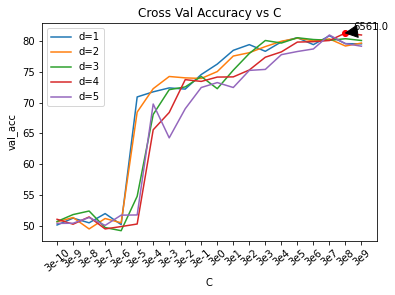

In [361]:
# plot p_acc_list vs C for each d with subplot
import matplotlib.pyplot as plt

for i in range(len(res)):
    # plt.figure(figsize=(20,20))
    # plt.subplot(5,10,i+1)
    plt.plot(res[i])
plt.legend(['d=1', 'd=2', 'd=3', 'd=4', 'd=5'])

# plt.plot(p_acc_list)
plt.title('Cross Val Accuracy vs C')
plt.xlabel('C')
plt.ylabel('val_acc')
plt.xticks([i for i in range(20)],[f"3e{i}" for i in range(-10, 10)], rotation=40)
# mark max
plt.plot(c_star_index, res.max(), 'ro')
# max lengend
plt.annotate(f'{c_star}', xy=(c_star_index, res.max()), xytext=(c_star_index+0.5, res.max()+0.5), arrowprops=dict(facecolor='black', shrink=0.01))

# C4
Let (C ∗,d ∗) be the best pair found previously. Fix C to be C ∗. Plot the five-fold cross-validation error and the test errors for the hypotheses obtained as a function of d. Plot the average number of support vectors obtained as a function of d. How many of the support vectors lie on the margin hyperplanes?

In [362]:
c_star = C[unravel_index(res.argmax(), res.shape)[1]]
d_star = unravel_index(res.argmax(), res.shape)[0] + 1

In [363]:
c_star

6561.0

In [364]:
d_star

4

In [365]:
# list save result

val_acc_res = []
test_acc_res = []
sv_counts_res = []
for d in range(1,6):
    val_acc_list = []
    test_acc_list = []
    sv_counts_list = []
    m_list = []
    for fold in range(5):
        # split train val
        train_x_scaled_, val_x_scaled, train_y_scaled_, val_y_scaled = train_test_split(train_x_scaled, train_y_scaled, test_size=0.2)

        m = svm_train(train_y_scaled_, train_x_scaled_, f'-t 1 -c {c_star} -d {d}')
        sv_len = m.get_sv_indices()
        sv_counts_list += [len(sv_len)]
        p_label, p_acc, p_val = svm_predict(val_y_scaled, val_x_scaled, m)
        val_acc_list += [p_acc[0]]
        p_label, p_acc, p_val = svm_predict(test_y_scaled, test_x_scaled, m)
        test_acc_list += [p_acc[0]]
        # get sup vec counts
        
    val_acc_res += [sum(val_acc_list)/5]
    test_acc_res += [sum(test_acc_list)/5]
    sv_counts_res += [sum(sv_counts_list)/5]

........................................................................................................................*...............*.............................................................................................................................................................................................................................................................................................................................*.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [366]:
val_acc_res

[78.78787878787878,
 79.77671451355661,
 82.07336523125997,
 80.54226475279106,
 80.5103668261563]

([<matplotlib.axis.XTick at 0x7f1809c3c5e0>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

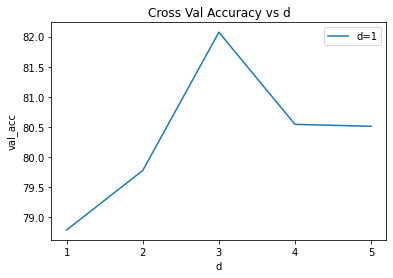

In [367]:
# plot val_acc as function of d
import matplotlib.pyplot as plt
plt.plot(val_acc_res)
plt.legend(['d=1', 'd=2', 'd=3', 'd=4', 'd=5'])
plt.title('Cross Val Accuracy vs d')
plt.xlabel('d')
plt.ylabel('val_acc')
plt.xticks([i for i in range(5)],[f"{i}" for i in range(1,6)])

([<matplotlib.axis.XTick at 0x7f1809bad640>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

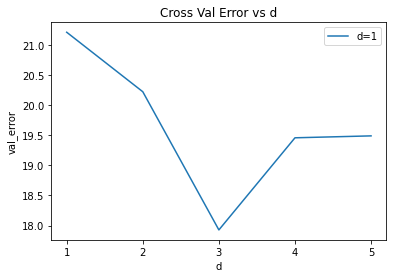

In [368]:
# plot val error as function of d
import matplotlib.pyplot as plt
val_acc_res = np.array(val_acc_res)
plt.plot(100-val_acc_res)
plt.legend(['d=1', 'd=2', 'd=3', 'd=4', 'd=5'])
plt.title('Cross Val Error vs d')
plt.xlabel('d')
plt.ylabel('val_error')
plt.xticks([i for i in range(5)],[f"{i}" for i in range(1,6)])

([<matplotlib.axis.XTick at 0x7f1809b59a00>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

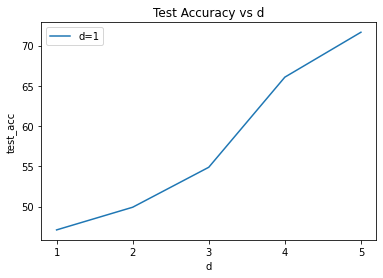

In [369]:
# plot val_acc as function of d
import matplotlib.pyplot as plt
plt.plot(test_acc_res)
plt.legend(['d=1', 'd=2', 'd=3', 'd=4', 'd=5'])
plt.title('Test Accuracy vs d')
plt.xlabel('d')
plt.ylabel('test_acc')
plt.xticks([i for i in range(5)],[f"{i}" for i in range(1,6)])

([<matplotlib.axis.XTick at 0x7f1809b14730>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

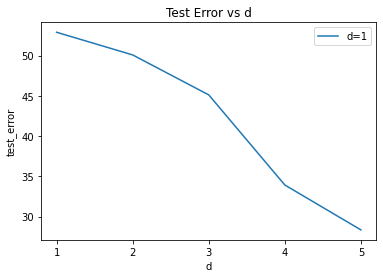

In [370]:
# plot test error as function of d
import matplotlib.pyplot as plt
test_acc_res = np.array(test_acc_res)
plt.plot(100-test_acc_res)
plt.legend(['d=1', 'd=2', 'd=3', 'd=4', 'd=5'])
plt.title('Test Error vs d')
plt.xlabel('d')
plt.ylabel('test_error')
plt.xticks([i for i in range(5)],[f"{i}" for i in range(1,6)])

## Support Vector Counts

([<matplotlib.axis.XTick at 0x7f1809aec610>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

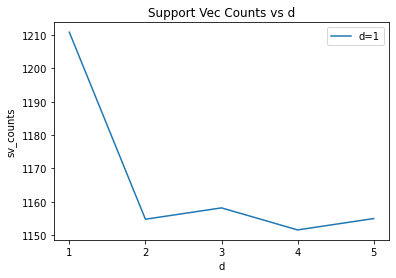

In [371]:
# plot
import matplotlib.pyplot as plt
plt.plot(sv_counts_res)
plt.legend(['d=1', 'd=2', 'd=3', 'd=4', 'd=5'])
plt.title('Support Vec Counts vs d')
plt.xlabel('d')
plt.ylabel('sv_counts')
plt.xticks([i for i in range(5)],[f"{i}" for i in range(1,6)])

# C5
Fix (C,d) to be (C ∗,d ∗). Plot the training and test errors as a function of the training sample.

In [372]:
c_star = C[unravel_index(res.argmax(), res.shape)[1]]
d_star = unravel_index(res.argmax(), res.shape)[0] + 1

In [382]:
train_y_scaled, train_x_scaled = svm_read_problem('./cached_datasets/abalone_train_scaled')

In [390]:
ratio_val_res = []
ratio_test_res = []
for ratio in np.arange(0.1, 1.1, 0.1):
    val_acc_list = []
    test_acc_list = []
    # ratio = round(i, 1)
    # train_num = int(len(train_x_scaled)*ratio)
    drop_size = 1 - ratio
    print(ratio)
    print(f"drop_size: {drop_size}")
    if drop_size != 0:
        part_train_x_scaled, _, part_train_y_scaled, _ = train_test_split(train_x_scaled, train_y_scaled, test_size=drop_size)
    else:
        part_train_x_scaled, part_train_y_scaled = train_x_scaled, train_y_scaled

    for i in range(5):
        train_x_scaled_, val_x_scaled, train_y_scaled_, val_y_scaled = train_test_split(part_train_x_scaled, part_train_y_scaled, test_size=0.2)
        m = svm_train(train_y_scaled_, train_x_scaled_, f'-t 1 -c {c_star} -d {d_star}')
        sv_len = m.get_sv_indices()
        sv_counts_list += [len(sv_len)]
        p_label, p_acc, p_val = svm_predict(val_y_scaled, val_x_scaled, m)
        val_acc_list += [p_acc[0]]
        p_label, p_acc, p_val = svm_predict(test_y_scaled, test_x_scaled, m)
        test_acc_list += [p_acc[0]]
    ratio_val_res += [sum(val_acc_list)/5]
    ratio_test_res += [sum(test_acc_list)/5]

0.1
drop_size: 0.9
.....................*.............*...*
optimization finished, #iter = 9260
nu = 0.339069
obj = -517634.262085, rho = -0.568996
nSV = 100, nBSV = 76
Total nSV = 100
Accuracy = 71.4286% (45/63) (classification)
Accuracy = 43.5824% (455/1044) (classification)
.......................................*.......................................*....*
optimization finished, #iter = 20471
nu = 0.366815
obj = -569021.651676, rho = -0.724279
nSV = 110, nBSV = 78
Total nSV = 110
Accuracy = 76.1905% (48/63) (classification)
Accuracy = 62.6437% (654/1044) (classification)
......................................................*.............*
optimization finished, #iter = 16843
nu = 0.373257
obj = -569142.246676, rho = 0.039270
nSV = 111, nBSV = 81
Total nSV = 111
Accuracy = 80.9524% (51/63) (classification)
Accuracy = 54.7893% (572/1044) (classification)
.......................*...............*
optimization finished, #iter = 9516
nu = 0.427387
obj = -654284.959109, rho = 0.216564
n

In [391]:
ratio_val_res

[80.63492063492063,
 77.46031746031746,
 79.25531914893618,
 80.79681274900398,
 80.31847133757962,
 78.51063829787233,
 80.41002277904327,
 80.67729083665338,
 79.8936170212766,
 80.54226475279106]

Text(0, 0.5, 'val_acc')

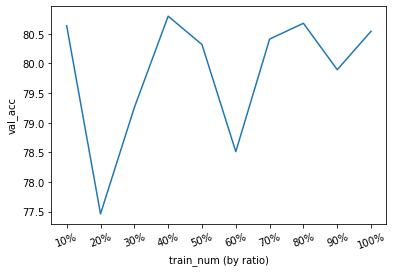

In [400]:
# plot
import matplotlib.pyplot as plt
plt.plot(ratio_val_res)
plt.xticks([i for i in range(10)],[f"{i}%" for i in range(10,110,10)], rotation=20)
plt.xlabel('train_num (by ratio)')
plt.ylabel('val_acc')
# ratio from 0.1 to 1.0 with 0.1 step


Text(0, 0.5, 'test_acc')

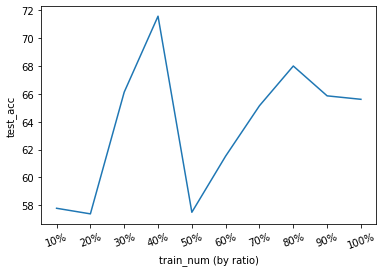

In [401]:
# plot
import matplotlib.pyplot as plt
plt.plot(ratio_test_res)
plt.xticks([i for i in range(10)],[f"{i}%" for i in range(10,110,10)], rotation=20)
plt.xlabel('train_num (by ratio)')
plt.ylabel('test_acc')
# ratio from 0.1 to 1.0 with 0.1 step


# C6(c)
Apply Stochastic Gradient Descent to solve the optimization problem. Plot the five-fold crossvalidation training and test errors for the hypotheses obtained based on the solution α as a function of d, for the best value of C measured on the validation set.

In [437]:
# nu-svm
full_val_acc_res = []
full_test_acc_res = []
for d in range(1, 6):
    val_acc_res = []
    test_acc_res = []
    for c in C:
        test_acc_list = []
        val_acc_list = []
        for i in range(5):
            train_x_scaled_, val_x_scaled, train_y_scaled_, val_y_scaled = train_test_split(train_x_scaled, train_y_scaled, test_size=0.2)
            m = svm_train(train_y_scaled_, train_x_scaled_, f'-t 1 -c {c} -d {d}')
            sv_len = m.get_sv_indices()
            sv_counts_list += [len(sv_len)]
            p_label, p_acc, p_val = svm_predict(val_y_scaled, val_x_scaled, m)
            val_acc_list += [p_acc[0]]
            p_label, p_acc, p_val = svm_predict(test_y_scaled, test_x_scaled, m)
            test_acc_list += [p_acc[0]]
        val_acc_res += [sum(val_acc_list)/5]
        test_acc_res += [sum(test_acc_list)/5]
    full_val_acc_res += [val_acc_res]
    full_test_acc_res += [test_acc_res]

.
*
optimization finished, #iter = 1225
nu = 0.974461
obj = -0.041330, rho = -0.993988
nSV = 2442, nBSV = 2442
Total nSV = 2442
Accuracy = 49.9203% (313/627) (classification)
Accuracy = 47.7011% (498/1044) (classification)
.
*
optimization finished, #iter = 1228
nu = 0.980048
obj = -0.041566, rho = 0.993737
nSV = 2456, nBSV = 2456
Total nSV = 2456
Accuracy = 51.0367% (320/627) (classification)
Accuracy = 47.7011% (498/1044) (classification)
.
*
optimization finished, #iter = 1214
nu = 0.965682
obj = -0.040959, rho = -0.994293
nSV = 2420, nBSV = 2420
Total nSV = 2420
Accuracy = 48.1659% (302/627) (classification)
Accuracy = 47.7011% (498/1044) (classification)
.
*
optimization finished, #iter = 1253
nu = 1.000000
obj = -0.042408, rho = 0.000777
nSV = 2506, nBSV = 2506
Total nSV = 2506
Accuracy = 72.5678% (455/627) (classification)
Accuracy = 58.7165% (613/1044) (classification)
.
*
optimization finished, #iter = 1213
nu = 0.968077
obj = -0.041059, rho = 0.994154
nSV = 2426, nBSV = 2426


In [438]:
full_val_acc_res = np.array(full_val_acc_res)
full_test_acc_res = np.array(full_test_acc_res)

In [439]:
full_val_acc_res

array([[54.06698565, 50.7814992 , 49.28229665, 50.01594896, 49.8245614 ,
        71.99362041, 69.88835726, 73.23763955, 73.84370016, 74.83253589,
        76.10845295, 78.97926635, 78.02232855, 79.01116427, 79.96810207,
        79.74481659, 78.59649123, 79.68102073, 78.69218501, 80.28708134],
       [51.45135566, 51.32376396, 51.83413078, 50.07974482, 51.1323764 ,
        69.95215311, 72.44019139, 72.63157895, 73.11004785, 74.80063796,
        73.74800638, 77.51196172, 78.59649123, 79.17065391, 79.36204147,
        81.33971292, 81.18022329, 79.5215311 , 80.12759171, 80.09569378],
       [51.51515152, 50.36682616, 51.86602871, 51.48325359, 51.51515152,
        55.02392344, 66.98564593, 71.70653907, 73.52472089, 73.84370016,
        74.38596491, 74.54545455, 78.5645933 , 79.13875598, 79.77671451,
        79.87240829, 82.00956938, 80.19138756, 79.68102073, 80.86124402],
       [51.77033493, 50.27113238, 51.10047847, 50.46251994, 48.64433812,
        50.7814992 , 65.90111643, 69.2185008 , 7

In [440]:
best_c_index = full_val_acc_res.argmax(axis=1)

In [441]:
# selec best c accordning to best val acc

In [442]:
select_test_acc = []
select_val_acc = []
for i in range(5):
    select_test_acc += [full_test_acc_res[i, best_c_index[i]]]
    select_val_acc += [full_val_acc_res[i, best_c_index[i]]]

In [443]:
best_c_index

array([19, 15, 16, 18, 16])

In [450]:
select_c = []
for i in range(5):
    select_c += [C[best_c_index[i]]]
d_list = [1, 2, 3, 4, 5]
a = zip(select_c, d_list)

In [451]:
select_val_acc

array([80.28708134, 81.33971292, 82.00956938, 80.66985646, 79.74481659])

([<matplotlib.axis.XTick at 0x7f180903a580>,
 [Text(0, 0, '(19683.0, 1)'),
  Text(1, 0, '(243.0, 2)'),
  Text(2, 0, '(729.0, 3)'),
  Text(3, 0, '(6561.0, 4)'),
  Text(4, 0, '(729.0, 5)')])

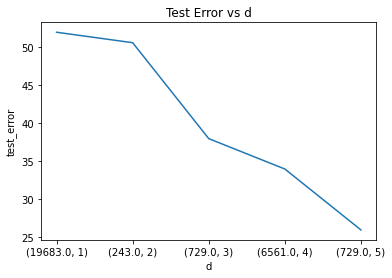

In [452]:
# plot d vs d
import matplotlib.pyplot as plt
select_test_acc = np.array(select_test_acc)
plt.plot(100 - select_test_acc)
plt.title('Test Error vs d')
plt.xlabel('d')
plt.ylabel('test_error')
plt.xticks([i for i in range(5)], a)

([<matplotlib.axis.XTick at 0x7f18090174c0>,
 [Text(0, 0, '(1, 19683.0)'),
  Text(1, 0, '(2, 243.0)'),
  Text(2, 0, '(3, 729.0)'),
  Text(3, 0, '(4, 6561.0)'),
  Text(4, 0, '(5, 729.0)')])

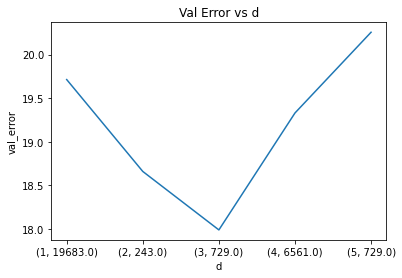

In [453]:
# plot d vs d
import matplotlib.pyplot as plt
select_val_acc = np.array(select_val_acc)
plt.plot(100 - select_val_acc)
# plt.legend(['d=1', 'd=2', 'd=3', 'd=4', 'd=5'])
plt.title('Val Error vs d')
plt.xlabel('d')
plt.ylabel('val_error')
a = zip(d_list, select_c)
plt.xticks([i for i in range(5)], a)